In [ ]:
# Import necessary modules
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [ ]:
# Set the path of the Database files
oPath = 'database/tables'
# Read all the sheets from the excel file.
students = pd.read_csv('{}/students.csv'.format(oPath), header = 0)
classes = pd.read_csv('{}/classes.csv'.format(oPath), header = 0)
tests = pd.read_csv('{}/tests.csv'.format(oPath), header = 0)
test_results = pd.read_csv('{}/test_results.csv'.format(oPath), header = 0)
attendance = pd.read_csv('{}/attendance.csv'.format(oPath), header = 0)
hw = pd.read_csv('{}/hw_assignments.csv'.format(oPath), header = 0)
hw_results = pd.read_csv('{}/hw_grades.csv'.format(oPath), header = 0)
participation = pd.read_csv('{}/participation.csv'.format(oPath), header = 0)
points = pd.read_csv('{}/points.csv'.format(oPath), header = 0)
# Merge attendance and class ID from students
attendance = pd.merge(attendance, students[['STUDENT_ID', 'CLASS_ID']], how = 'inner', on = 'STUDENT_ID')
# Get a list of ALL Class IDs
lClasses = classes['CLASS_ID'].to_list()
# Get a list of ALL Student IDs
lStudents = students['STUDENT_ID'].to_list()

In [ ]:
# FUNCTIONS
# Define a function to show values at scatter plot points
def fShowValuesScatter(axis, x, y, decimals, ychange):
    for i, j in zip(x, y):
        axis.annotate('{:.{}f}'.format(j, decimals), xy = (i, j), xytext=(ychange, 0), textcoords="offset points", va='center')
        
# Define a function to show values on bar plots
def fShowValuesOnBars(axs, decimals):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.05
            value = '{:.{}f}'.format(p.get_height(), decimals)
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Define a function to show values on bar plots
def fShowValuesOnBarsCenter(axs, decimals, yMod):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() / yMod
            value = '{:.{}f}'.format(p.get_height(), decimals)
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
# Set the class ID
tiClassID = 1
# Get a list of Student IDs in this class
lStudentsInCurrentClass = students['STUDENT_ID'].where(students['CLASS_ID'] == tiClassID)
lStudentsInCurrentClass.dropna(how = 'all', inplace = True)
lStudentsInCurrentClass = lStudentsInCurrentClass.astype({'STUDENT_ID': 'int32'})
lStudentsInCurrentClass = lStudentsInCurrentClass.reset_index(drop = True)

# Monthly Report

In [ ]:
# Set the month and year
tiYear = 2014
tiMonth = 10
# Get the month name from its number
oMonth = datetime.date(tiYear, tiMonth, 1).strftime('%B')
# Get previous month name
oMonthLast = datetime.date(tiYear, tiMonth - 1, 1).strftime('%B')
# Get the number of students in this class
oNumberStudents = students[students['CLASS_ID'] == tiClassID].shape[0]

## For the User-defined Class

### PREPARE DATAFRAMES

In [ ]:
# Students DF
dfStudents = students.where(students['CLASS_ID'] == tiClassID)
dfStudents.dropna(how = 'all', inplace = True)
dfStudents = dfStudents.astype({'STUDENT_ID': 'int32', 'STUDENT_AGE': 'int32', 'CLASS_ID': 'int32'})
dfStudents = dfStudents.reset_index(drop = True)
# Test Scores DF
dfTestScores = test_results.where(test_results['CLASS_ID'] == tiClassID)
dfTestScores.dropna(how = 'all', inplace = True)
dfTestScores = dfTestScores.astype({'STUDENT_ID': 'int32', 'TEST_ID': 'int32', 'TEST_SCORE': 'int32', 'TEST_SCORE_MAX': 'int32', 'CLASS_ID': 'int32'})
dfTestScores['TEST_DATE'] = pd.to_datetime(dfTestScores['TEST_DATE'])
dfTestScores = dfTestScores.reset_index(drop = True)
# Get a list of all Test IDs
lTestIDs = dfTestScores['TEST_ID'].unique()
# Attendance DF
dfAttendance = attendance.where(attendance['CLASS_ID'] == tiClassID)
dfAttendance.dropna(how = 'all', inplace = True)
dfAttendance = dfAttendance.astype({'STUDENT_ID': 'int32', 'CLASS_ID': 'int32'})
dfAttendance['CLASS_DATE'] = pd.to_datetime(dfAttendance['CLASS_DATE'])
dfAttendance = dfAttendance.reset_index(drop = True)
# HW Scores DF
dfHWScores = hw_results.where(hw_results['CLASS_ID'] == tiClassID)
dfHWScores.dropna(how = 'all', inplace = True)
dfHWScores = dfHWScores.astype({'STUDENT_ID': 'int32', 'HW_ID': 'int32', 'HW_SCORE': 'int32', 'HW_SCORE_MAX': 'int32', 'CLASS_ID': 'int32'})
dfHWScores['HW_ASSIGNED_DATE'] = pd.to_datetime(dfHWScores['HW_ASSIGNED_DATE'])
dfHWScores['HW_TURNED_IN_DATE'] = pd.to_datetime(dfHWScores['HW_TURNED_IN_DATE'])
dfHWScores = dfHWScores.reset_index(drop = True)
# Get a list of all the HW IDs
lHWIDs = dfHWScores['HW_ID'].unique() 
# Participation DF
dfParticipation = participation.where(participation['CLASS_ID'] == tiClassID)
dfParticipation.dropna(how = 'all', inplace = True)
dfParticipation = dfParticipation.astype({'STUDENT_ID': 'int32', 'PARTICIPATION_ATTEMPTS': 'int32', 'PARTICIPATION_HINTS': 'int32', 'CLASS_ID': 'int32'})
dfParticipation['PARTICIPATION_DATETIME'] = pd.to_datetime(dfParticipation['PARTICIPATION_DATETIME'])
dfParticipation = dfParticipation.reset_index(drop = True)
# Tests DF
dfTests = tests[tests['TEST_ID'].isin(lTestIDs)]
dfTests.dropna(how = 'all', inplace = True)
dfTests['TEST_DATE'] = pd.to_datetime(dfTests['TEST_DATE'])
dfTests = dfTests.reset_index(drop = True)
# HW DF
dfHW = hw[hw['HW_ID'].isin(lHWIDs)]
dfHW.dropna(how = 'all', inplace = True)
dfHW['HW_ASSIGNED_DATE'] = pd.to_datetime(dfHW['HW_ASSIGNED_DATE'])
dfHW['HW_DUE_DATE'] = pd.to_datetime(dfHW['HW_DUE_DATE'])
dfHW = dfHW.reset_index(drop = True)
# POINTS DF
dfPoints = pd.merge(points, students[['STUDENT_ID', 'CLASS_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')
dfPoints = dfPoints.where(dfPoints['CLASS_ID'] == tiClassID)
dfPoints.dropna(how = 'all', inplace = True)
dfPoints = dfPoints.astype({'STUDENT_ID':'int32', 'CLASS_ID':'int32', 'PARTICIPATION_POINTS':'int32', 'HW_POINTS':'int32', 'TEST_POINTS':'int32', 'ATTENDANCE_POINTS':'int32', 'TOTAL_POINTS':'int32'})
dfPoints = dfPoints.reset_index(drop = True)

# TESTS
# Test Scores
dfTestScoresDate = dfTestScores.where((dfTestScores['TEST_DATE'].dt.year == tiYear) & (dfTestScores['TEST_DATE'].dt.month == tiMonth))
dfTestScoresDateMinus1 = dfTestScores.where((dfTestScores['TEST_DATE'].dt.year == tiYear) & (dfTestScores['TEST_DATE'].dt.month == tiMonth - 1))
dfTestScoresDateMinus2 = dfTestScores.where((dfTestScores['TEST_DATE'].dt.year == tiYear) & (dfTestScores['TEST_DATE'].dt.month == tiMonth - 2))
# Test Names
dfTestsDate = dfTests.where((dfTests['TEST_DATE'].dt.year == tiYear) & (dfTests['TEST_DATE'].dt.month == tiMonth))
# ATTENDANCE
dfAttendanceDate = dfAttendance.where((dfAttendance['CLASS_DATE'].dt.year == tiYear) & (dfAttendance['CLASS_DATE'].dt.month == tiMonth))
dfAttendanceDate.dropna(how = 'all', inplace = True)
# PARTICIPATION
# Current Month
dfParticipationDate = dfParticipation.where((dfParticipation['PARTICIPATION_DATETIME'].dt.year == tiYear) & (dfParticipation['PARTICIPATION_DATETIME'].dt.month == tiMonth))
dfParticipationDate.dropna(how = 'all', inplace = True)
dfParticipationDate = dfParticipationDate.reset_index(drop = True)
# Current Month - 1
dfParticipationDateMinus1 = dfParticipation.where((dfParticipation['PARTICIPATION_DATETIME'].dt.year == tiYear) & (dfParticipation['PARTICIPATION_DATETIME'].dt.month == tiMonth - 1))
dfParticipationDateMinus1.dropna(how = 'all', inplace = True)
dfParticipationDateMinus1 = dfParticipationDateMinus1.reset_index(drop = True)
# HOMEWORK
# Homework Assignments
dfHWDate = dfHW.where((dfHW['HW_ASSIGNED_DATE'].dt.year == tiYear) & (dfHW['HW_ASSIGNED_DATE'].dt.month == tiMonth))
# Homework Scores
dfHWScoresDate = dfHWScores.where((dfHWScores['HW_ASSIGNED_DATE'].dt.year == tiYear) & (dfHWScores['HW_ASSIGNED_DATE'].dt.month == tiMonth))

# Can use this to loopify the above?
lDFs = [dfStudents, dfTestScores, dfAttendance, dfHWScores, dfParticipation, dfTests, dfHW]

In [ ]:
dfAttendanceAbsent = attendance.where(attendance['ATTENDANCE_STATUS'] == 'absent')
dfAttendanceAbsent.dropna(how = 'all', inplace = True)

### Test Grades

#### *Prepare the DataFrames*

In [ ]:
# Merge the test results DF with students DF for the specified class
dfTestScoresDate = pd.merge(dfTestScoresDate, dfStudents, on = 'STUDENT_ID')
# Sort the DF by test score in descending order
dfTestScoresDate = dfTestScoresDate.sort_values(by = 'TEST_SCORE', ascending = False)
# Calculate the average score for each student
oTestScoreMean = dfTestScoresDate['TEST_SCORE'].mean()

#### *Plots*

In [ ]:
# Current Month's Test Scores

# Plot the data
ax = dfTestScoresDate.plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'TEST_SCORE', figsize=(20,8), label='Test Score')
# Plot the this month's HW average score
plt.axhline(y = oTestScoreMean, color = 'darkblue', linestyle = 'dashed', label = '{} Test Average'.format(oMonth))
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("Test Scores", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Test Score", size = 18, style="italic")
# Add labels
fShowValuesOnBars(ax, 0)

### Homework Grades

#### *Prepare the DataFrames*

In [ ]:
# Merge the HW grades with students DF for the specified class
dfHWScoresDate = pd.merge(dfHWScoresDate, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')
dfHWScoresDate.dropna(how = 'all', inplace = True)
# Calculate the average score for each student
dfHWScoresDateAverages = dfHWScoresDate.groupby(['STUDENT_NAME_ENGLISH'])['HW_SCORE'].mean()
# Turn the above series into a DataFrame
dfHWScoresDateAverages = pd.DataFrame(dfHWScoresDateAverages)

#### *Plots*

In [ ]:
# Plot the data
ax = dfHWScoresDate.plot.scatter(x = 'STUDENT_NAME_ENGLISH', y = 'HW_SCORE', c = 'HW_ID', s = 150, figsize=(25, 8))
# Plot the average for each HW_ID
lColors = ['darkblue', 'orange', 'darkgreen', 'lightgreen', 'blue', 'purple', 'red']
oColor = 0
for i in list(dfHWScoresDate['HW_ID'].unique()):
    plt.axhline(y = dfHWScoresDate['HW_SCORE'].where(dfHWScoresDate['HW_ID'] == int(i)).mean(), 
            color = lColors[oColor], linestyle = 'dashed', label = f'HW {int(i)} Average')
    oColor += 1
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("HW Scores", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("HW Score", size = 18, style="italic")
ax.set(ylim = (-1, 10))
# Add labels
x = dfHWScoresDate['STUDENT_NAME_ENGLISH']
y = dfHWScoresDate['HW_SCORE']
fShowValuesScatter(ax, x, y, 0, 7)

#### Using Subplots

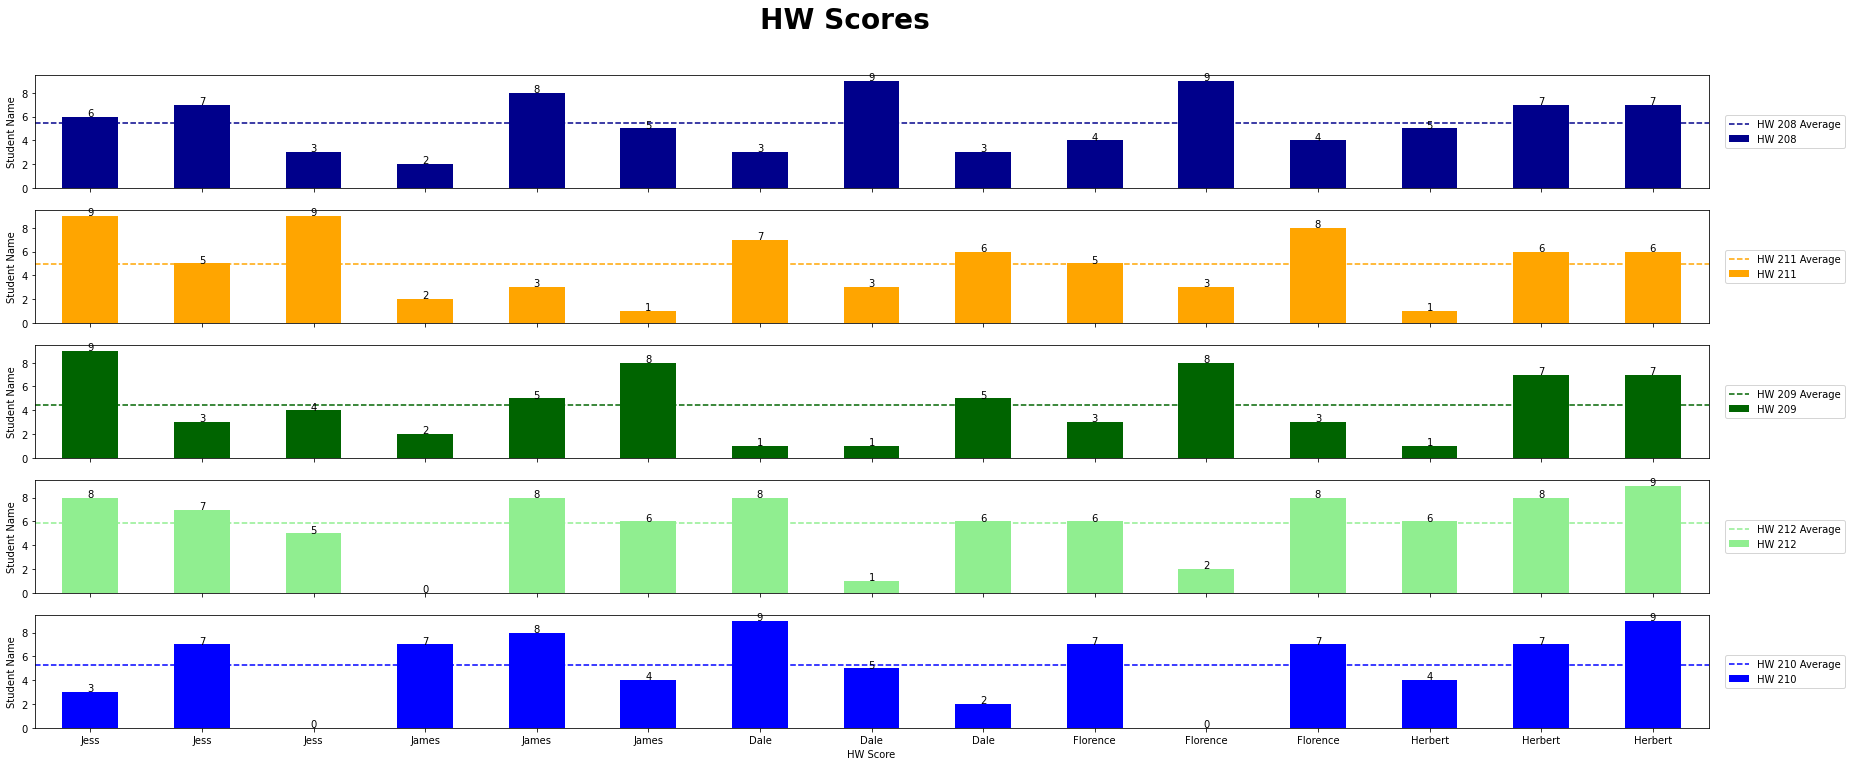

In [92]:
# Get the number of IDs
blah = dfHWScoresDate.sort_values(by = 'HW_ID')
oIDCount = len(list(blah['HW_ID'].unique()))
# Define the figure and axis
fig, axes = plt.subplots(oIDCount)
# Define the colors list
lColors = ['darkblue', 'orange', 'darkgreen', 'lightgreen', 'blue', 'purple', 'red']
# Define the color index
oColor = 0
# Loop through the HW_IDs
for i in list(dfHWScoresDate['HW_ID'].unique()):
    # Pull the scores for the specific HW_ID
    df = dfHWScoresDate.where(dfHWScoresDate['HW_ID'] == int(i))
    # Turn it into a DF to make it easily to manipulate
    df = pd.DataFrame(df)
    # Drop NANs
    df.dropna(how = 'all', inplace = True)
    # Plot the subplot
    df.plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'HW_SCORE', 
                ax = axes[oColor], figsize=(30,12), 
                label = f'HW {int(i)}', color = lColors[oColor],   
                rot = 0)
    # Plot the average for the specific ID
    axes[oColor].axhline(y = dfHWScoresDate['HW_SCORE'].where(dfHWScoresDate['HW_ID'] == int(i)).mean(), 
                            color = lColors[oColor], linestyle = 'dashed', label = f'HW {int(i)} Average')
    # Set up the legend
    axes[oColor].legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
    oColor += 1

# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("HW Scores", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
# Add labels
fShowValuesOnBars(axes, 0)
# Set Labels
for ax in axes.flat:
    ax.set(xlabel='HW Score', ylabel='Student Name')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()

### Attendance

#### *Prepare the DataFrames*

In [ ]:
# Merge the attendance DF with the students DF
dfAttendanceDate = pd.merge(dfAttendanceDate, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')
# Group by name and status to get totals for each status by student
dfAttendanceStatus = dfAttendanceDate.groupby(['STUDENT_NAME_ENGLISH', 'ATTENDANCE_STATUS']).count()
# Create new DF of all the instances of an absent status
dfAttendanceDateAbsent = dfAttendanceDate.where(dfAttendanceDate['ATTENDANCE_STATUS'] == 'absent')
# Drop the NANs from this newly created DF
dfAttendanceDateAbsent.dropna(how = 'all', inplace = True)
# Reset the index
dfAttendanceDateAbsent = dfAttendanceDateAbsent.reset_index(drop = True)

#### *Strings/Lists*

In [ ]:
oAbsentCount = dfAttendanceDate['ATTENDANCE_STATUS'].str.contains('absent').sum()
# Print the output
if oAbsentCount > 0:
    # Define a list to store all the instances of absent students
    lAbsences = []
    # Loop through the rows to populate the list
    for index, row in dfAttendanceDateAbsent.iterrows():
        # Pull the name from the current row
        oName = dfAttendanceDateAbsent['STUDENT_NAME_ENGLISH'][index]
        # Pull the date from the current row
        oDate = str(dfAttendanceDateAbsent['CLASS_DATE'][index])[0:10]
        # Define a string to be appended to the list
        sText = '{} was absent on {}'.format(oName, oDate)
        # Append the string to the list
        lAbsences.append(sText)   
    print(lAbsences)
else:
    # Define a string to be used in the report
    sMessage = 'No students were absent in {}, {}'.format(oMonth, tiYear)
    print(sMessage)

### Participation

#### *Preparing the DataFrames*

In [ ]:
# Merge the student's name with the participation DF
dfParticipationDate = pd.merge(dfParticipationDate, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')
dfParticipationDateMinus1 = pd.merge(dfParticipationDateMinus1, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')
# Group by participation type and student ID
dfParticipationDateType = dfParticipationDate.groupby(['STUDENT_ID', 'PARTICIPATION_TYPE'])['PARTICIPATION_TYPE'].count()
dfParticipationDateType = pd.DataFrame(dfParticipationDateType)
dfParticipationDateType = dfParticipationDateType.rename(columns = {'STUDENT_ID': 'STUDENT_ID', 'PARTICIPATION_TYPE':'PARTICIPATION_TYPE', 'PARTICIPATION_TYPE':'PART_TYPE_COUNT'})

dfParticipationDateTypeMinus1 = dfParticipationDateMinus1.groupby(['STUDENT_ID', 'PARTICIPATION_TYPE'])['PARTICIPATION_TYPE'].count()
dfParticipationDateTypeMinus1 = pd.DataFrame(dfParticipationDateTypeMinus1)
dfParticipationDateTypeMinus1 = dfParticipationDateTypeMinus1.rename(columns = {'STUDENT_ID': 'STUDENT_ID', 'PARTICIPATION_TYPE':'PARTICIPATION_TYPE', 'PARTICIPATION_TYPE':'PART_TYPE_COUNT'})
# Create a pivot table of the same group by
dfParticipationDateTypePivot = dfParticipationDate.pivot_table(index = 'STUDENT_ID', columns = 'PARTICIPATION_TYPE', values = 'CLASS_ID', aggfunc = 'count')


dfParticipationDateTypePivotMinus1 = dfParticipationDateMinus1.pivot_table(index = 'STUDENT_ID', columns = 'PARTICIPATION_TYPE', values = 'CLASS_ID', aggfunc = 'count')
# Merge it with student names
dfParticipationDateTypePivot = pd.merge(dfParticipationDateTypePivot, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')

dfParticipationDateTypePivotMinus1 = pd.merge(dfParticipationDateTypePivotMinus1, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')
# Group by student ID and count them to get the total number of participation instances per student
dfParticipationDateCount = dfParticipationDate.groupby(['STUDENT_ID'])['STUDENT_ID'].count()
dfParticipationDateCount = pd.DataFrame(dfParticipationDateCount)
dfParticipationDateCount = dfParticipationDateCount.rename(columns = {'STUDENT_ID': 'STUDENT_ID', 'STUDENT_ID':'PART_COUNT'})

dfParticipationDateCountMinus1 = dfParticipationDateMinus1.groupby(['STUDENT_ID'])['STUDENT_ID'].count()
dfParticipationDateCountMinus1 = pd.DataFrame(dfParticipationDateCountMinus1)
dfParticipationDateCountMinus1 = dfParticipationDateCountMinus1.rename(columns = {'STUDENT_ID': 'STUDENT_ID', 'STUDENT_ID':'PART_COUNT'})
# Merge the part count DF with student names
dfParticipationDateCount = pd.merge(dfParticipationDateCount, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')

dfParticipationDateCountMinus1 = pd.merge(dfParticipationDateCountMinus1, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')

In [ ]:
# Create new DF from students and participation
value_counts = dfParticipationDate['STUDENT_ID'].value_counts()
# Convert value_counts to a DataFrame
dfPart = pd.DataFrame(value_counts)
# Reset its index
dfPart = dfPart.reset_index()
# Rename the columns to make them more readable
dfPart.columns = ['STUDENT_ID', 'PARTICIPATIONS COUNT']
# Merge the dfPart and students DataFrames
dfPart = pd.merge(dfPart, dfStudents[['STUDENT_ID', 'STUDENT_NAME_ENGLISH']], how = 'outer', on = 'STUDENT_ID')

dfByDate = dfParticipationDate.groupby(['STUDENT_ID', 'PARTICIPATION_DATETIME'])['PARTICIPATION_DATETIME'].count()
dfByDateMinus1 = dfParticipationDateMinus1.groupby(['STUDENT_ID', 'PARTICIPATION_DATETIME'])['PARTICIPATION_DATETIME'].count()
dfByDate = pd.DataFrame(dfByDate)
dfByDateMinus1 = pd.DataFrame(dfByDateMinus1)
dfByDate = dfByDate.rename(columns = {'STUDENT_ID': 'STUDENT_ID', 'PARTICIPATION_DATETIME': 'DATETIME', 'PARTICIPATION_DATETIME': 'COUNT'})
dfByDateMinus1 = dfByDateMinus1.rename(columns = {'STUDENT_ID': 'STUDENT_ID', 'PARTICIPATION_DATETIME': 'DATETIME', 'PARTICIPATION_DATETIME': 'COUNT'})

# Define a dictionary to store each student's DF in
dfPC = {}
dfPCMinus1 = {}
# Define a list of Means to store in the new dataframe
lMeanParticipations = []
lMeanParticipationsMinus1 = []
# Loop through the STUDENT_IDs and calculate their mean number of participations
for i in lStudentsInCurrentClass:
    # Copy the DataFrame for safety resons
    dfa = dfByDate
    dfaMinus1 = dfByDateMinus1
    # Create a new DF just for the one student
    dfPC[i] = dfa.loc[i]
    dfPCMinus1[i] = dfaMinus1.loc[i]
    # Set their ID to their ID from the list
    dfPC[i]['STUDENT_ID'] = i
    dfPCMinus1[i]['STUDENT_ID'] = i
    # Calculate the mean participations per class
    dfPC[i]['MEAN'] = dfPC[i]['COUNT'].mean()
    dfPCMinus1[i]['MEAN'] = dfPCMinus1[i]['COUNT'].mean()
    # Sort from highest to lowest count
    dfPC[i] = dfPC[i].sort_values(by = 'COUNT', ascending = False)
    dfPCMinus1[i] = dfPCMinus1[i].sort_values(by = 'COUNT', ascending = False)
    # Append the mean to lMeanParticipations
    lMeanParticipations.append(dfPC[i]['MEAN'][0])
    lMeanParticipationsMinus1.append(dfPCMinus1[i]['MEAN'][0])

# Define an empty list to store the student's mean attempts
lMeanAttempts = []
lMeanAttemptsMinus1 = []
# Define an empty list to store the studnt's mean hints
lMeanHints = []
lMeanHintsMinus1 = []
# Define an empty list to store the student's hint/attempt ratio
lAttemptsHintRatio = []
lAttemptsHintRatioMinus1 = []
# Loop throgh the STUDENT_IDs in the current class and calculate the mean attempts per participation, 
# the mean hints per participation, and the hint/attempts ratio
for i in lStudentsInCurrentClass:
    # Calculate the mean attempts for the specified student 
    oMeanAttempts = dfParticipationDate['PARTICIPATION_ATTEMPTS'].where(dfParticipationDate['STUDENT_ID'] == i).mean()
    oMeanAttemptsMinus1 = dfParticipationDateMinus1['PARTICIPATION_ATTEMPTS'].where(dfParticipationDateMinus1['STUDENT_ID'] == i).mean()
    # Append this mean to the list
    lMeanAttempts.append(oMeanAttempts)
    lMeanAttemptsMinus1.append(oMeanAttemptsMinus1)

    # Calculate the mean hints for the specified student 
    oMeanHints = dfParticipationDate['PARTICIPATION_HINTS'].where(dfParticipationDate['STUDENT_ID'] == i).mean()
    oMeanHintsMinus1 = dfParticipationDateMinus1['PARTICIPATION_HINTS'].where(dfParticipationDateMinus1['STUDENT_ID'] == i).mean()
    # Append this mean to the list
    lMeanHints.append(oMeanHints)
    lMeanHintsMinus1.append(oMeanHintsMinus1)

    # Sum the attempts
    oHintSum = dfParticipationDate['PARTICIPATION_HINTS'].where(dfParticipationDate['STUDENT_ID'] == i).sum()
    oHintSumMinus1 = dfParticipationDateMinus1['PARTICIPATION_HINTS'].where(dfParticipationDateMinus1['STUDENT_ID'] == i).sum()
    # Sum the hints
    oAttemptSum = dfParticipationDate['PARTICIPATION_ATTEMPTS'].where(dfParticipationDate['STUDENT_ID'] == i).sum()
    oAttemptSumMinus1 = dfParticipationDateMinus1['PARTICIPATION_ATTEMPTS'].where(dfParticipationDateMinus1['STUDENT_ID'] == i).sum()
    # Calculate the hint/attempts ratio for the specified student 
    oAttemptHintRatio = oAttemptSum / oHintSum
    oAttemptHintRatioMinus1 = oAttemptSumMinus1 / oHintSumMinus1 
    # Append this ratio to the list
    lAttemptsHintRatio.append(oAttemptHintRatio)
    lAttemptsHintRatioMinus1.append(oAttemptHintRatioMinus1)

# Create a new dataframe of the students and their mean participations per class
dfMeanPart = pd.DataFrame(columns = ['STUDENT_ID', 'MEAN_PARTICIPATIONS_PER_CLASS', 'MEAN_ATTEMPTS_PER_PART_INSTANCE', 'MEAN_HINTS_PER_PART_INSTANCE', 'ATTEMPTS/HINTS_RATIO'])
dfMeanPartMinus1 = pd.DataFrame(columns = ['STUDENT_ID', 'MEAN_PARTICIPATIONS_PER_CLASS', 'MEAN_ATTEMPTS_PER_PART_INSTANCE', 'MEAN_HINTS_PER_PART_INSTANCE', 'ATTEMPTS/HINTS_RATIO'])
# Set the student IDs to lStudents which is a list of student IDs
dfMeanPart['STUDENT_ID'] = lStudentsInCurrentClass
dfMeanPartMinus1['STUDENT_ID'] = lStudentsInCurrentClass
# Populate the MEAN_PARTICIPATIONS_PER_CLASS column
dfMeanPart['MEAN_PARTICIPATIONS_PER_CLASS'] = lMeanParticipations
dfMeanPartMinus1['MEAN_PARTICIPATIONS_PER_CLASS'] = lMeanParticipationsMinus1
# Populate the MEAN_ATTEMPTS_PER_PART_INSTANCE column
dfMeanPart['MEAN_ATTEMPTS_PER_PART_INSTANCE'] = lMeanAttempts
dfMeanPartMinus1['MEAN_ATTEMPTS_PER_PART_INSTANCE'] = lMeanAttemptsMinus1
# Populate the MEAN_HINTS_PER_PART_INSTANCE column
dfMeanPart['MEAN_HINTS_PER_PART_INSTANCE'] = lMeanHints
dfMeanPartMinus1['MEAN_HINTS_PER_PART_INSTANCE'] = lMeanHintsMinus1
# Populate the ATTEMPTS/HINTS_RATIO column
dfMeanPart['ATTEMPTS/HINTS_RATIO'] = lAttemptsHintRatio
dfMeanPartMinus1['ATTEMPTS/HINTS_RATIO'] = lAttemptsHintRatioMinus1
# Merge the new DF with students
dfMeanPart = pd.merge(dfMeanPart, students[['STUDENT_ID', 'STUDENT_NAME_ENGLISH', 'CLASS_ID']], how = 'inner', on = 'STUDENT_ID')
dfMeanPartMinus1 = pd.merge(dfMeanPartMinus1, students[['STUDENT_ID', 'STUDENT_NAME_ENGLISH', 'CLASS_ID']], how = 'inner', on = 'STUDENT_ID')
# Reorder the columns
dfMeanPart = dfMeanPart[['STUDENT_ID', 'STUDENT_NAME_ENGLISH', 'CLASS_ID', 'MEAN_PARTICIPATIONS_PER_CLASS', 'MEAN_ATTEMPTS_PER_PART_INSTANCE', 'MEAN_HINTS_PER_PART_INSTANCE', 'ATTEMPTS/HINTS_RATIO']]
dfMeanPartMinus1 = dfMeanPartMinus1[['STUDENT_ID', 'STUDENT_NAME_ENGLISH', 'CLASS_ID', 'MEAN_PARTICIPATIONS_PER_CLASS', 'MEAN_ATTEMPTS_PER_PART_INSTANCE', 'MEAN_HINTS_PER_PART_INSTANCE', 'ATTEMPTS/HINTS_RATIO']]

In [ ]:
# DataFrame of all students and their Cold/Volunteer ratio

# Define an empty DF to store the students
dfPartTypeColdvsVol = pd.DataFrame(columns= ['STUDENT_ID', 'STUDENT_NAME_ENGLISH', 'COLD/VOL_RATIO'])
# List of students how have more cold calls than volunteers
for index, row in dfParticipationDateTypePivot.iterrows():
    oID = dfParticipationDateTypePivot['STUDENT_ID'][index]
    oCold = dfParticipationDateTypePivot['cold call'][index]
    oVol = dfParticipationDateTypePivot['volunteer'][index]
    oName = dfParticipationDateCount['STUDENT_NAME_ENGLISH'][index]
    oRatio = oCold/oVol
    # Append a row to the DF
    dfPartTypeColdvsVol = dfPartTypeColdvsVol.append({'STUDENT_ID': oID, 'STUDENT_NAME_ENGLISH': oName, 'COLD/VOL_RATIO':oRatio, 'MORE_VOL_NEEDED':''}, ignore_index = True)
    # Determine whether they need to volunteer more
    if dfPartTypeColdvsVol['COLD/VOL_RATIO'][index] > 1.00:
        dfPartTypeColdvsVol['MORE_VOL_NEEDED'][index] = True
    else:
        dfPartTypeColdvsVol['MORE_VOL_NEEDED'][index] = False

#### *Plots*

##### Total Participation Instances This Month

In [ ]:
# Plot it
ax = dfParticipationDateCount.plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'PART_COUNT', figsize = (20, 8))
# Calculate the average
oAverage = dfParticipationDateType['PART_TYPE_COUNT'].sum() / oNumberStudents
# Plot the class average
plt.axhline(y = oAverage, color = 'darkorange', linestyle = 'dashed', label = '{} Average'.format(oMonth))
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("Particpations Count", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Count of Participation Instances", size = 18, style="italic")
# Add labels
fShowValuesOnBars(ax, 0)

##### Particpation by Type Distribution

In [ ]:
# Prepare the DF
dfTest = dfParticipationDateTypePivot.drop(columns = ['STUDENT_ID'], axis = 1)
# Define the plot
ax = dfTest.plot.bar(x = 'STUDENT_NAME_ENGLISH', figsize = (20, 8))
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("Participation by Type", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Count of Participations", size = 18, style="italic")
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Show values on the bars
fShowValuesOnBars(ax, 0)

##### Volunteer/Cold Call Ratio

In [ ]:
# Define the plot
ax = dfPartTypeColdvsVol.plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'COLD/VOL_RATIO', figsize=(20, 8), label = 'Cold/Vol Ratio (lower is better)')
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("Cold/Volunteer Ratio", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Cold/Vol Ratio", size = 18, style="italic")
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Show values on the bars
fShowValuesOnBars(ax, 2)

##### Mean Participations per Class

In [ ]:
ax = dfMeanPart.plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'MEAN_PARTICIPATIONS_PER_CLASS', figsize = (20, 8))
# Calculate the average
oAverage = dfMeanPart['MEAN_PARTICIPATIONS_PER_CLASS'].mean()
# Plot the class average
plt.axhline(y = oAverage, color = 'darkorange', linestyle = 'dashed', label = '{} Average'.format(oMonth))
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("Mean Participations per Class", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Participations Count", size = 18, style="italic")
# Add labels
fShowValuesOnBars(ax, 2)

##### Attempts per Participation Instance

In [ ]:
ax = dfMeanPart.plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'MEAN_ATTEMPTS_PER_PART_INSTANCE', figsize = (20, 8), label = 'Mean Attempts (lower is better)')
# Calculate the average
oAverage = dfMeanPart['MEAN_ATTEMPTS_PER_PART_INSTANCE'].mean()
# Plot the class average
plt.axhline(y = oAverage, color = 'darkorange', linestyle = 'dashed', label = '{} Average'.format(oMonth))
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("Mean Attempts per Participation Instance", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Mean Attempts", size = 18, style="italic")
# Add labels
fShowValuesOnBars(ax, 2)

##### Hints per Participation Instance

In [ ]:
ax = dfMeanPart.plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'MEAN_HINTS_PER_PART_INSTANCE', figsize = (20, 8), label = 'Mean Hints (lower is better)')
# Calculate the average
oAverage = dfMeanPart['MEAN_HINTS_PER_PART_INSTANCE'].mean()
# Plot the class average
plt.axhline(y = oAverage, color = 'darkorange', linestyle = 'dashed', label = '{} Average'.format(oMonth))
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("Mean Hints per Participation Instance", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Mean Hints", size = 18, style="italic")
# Add labels
fShowValuesOnBars(ax, 2)

##### *Attempts/Hints Ratio*

In [ ]:
ax = dfMeanPart.plot.bar(x = 'STUDENT_NAME_ENGLISH', y = 'ATTEMPTS/HINTS_RATIO', figsize = (20, 8), label = 'Attempt/Hint Ratio (higher is better)')
# Calculate the average
oAverage = dfMeanPart['ATTEMPTS/HINTS_RATIO'].mean()
# Plot the class average
plt.axhline(y = oAverage, color = 'darkorange', linestyle = 'dashed', label = '{} Average'.format(oMonth))
# Set up the legend
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Format the graph
tSubtitle = 'Class {} - {}, {}'.format(tiClassID, oMonth, tiYear)
plt.suptitle("Attempt/Hint Ratio", size = 28, fontweight = "bold", y = 0.96, ha = 'center')
ax.set_title(tSubtitle, size = 14, ha = 'center')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Attempt/Hint Ratio", size = 18, style="italic")
# Add labels
fShowValuesOnBars(ax, 2)

##### *Strings/Lists/Dictionaries/Tables*

In [ ]:
# Dictionary of students who have below average participation instances

# Define an empty dictionary to store the students
dBelowAveragePartCount = {}
# Calculate the average
oAverage = dfParticipationDateType['PART_TYPE_COUNT'].sum() / oNumberStudents
# Loop through the rows to find those lower than average
for index, row in dfParticipationDateCount.iterrows():
    oPartCount = dfParticipationDateCount['PART_COUNT'][index]
    oID = dfParticipationDateCount['STUDENT_ID'][index]
    oName = dfParticipationDateCount['STUDENT_NAME_ENGLISH'][index]
    if oPartCount < oAverage:
        dBelowAveragePartCount.update({oID:oName})

### Points

##### *Prepare the DataFrames*

In [ ]:
# Define empty lists to store the points
partTotalsList = []
hwTotalsList = []
testTotalsList = []
attTotalsList = []

# Loop through the student IDs to build the lists
for i in lStudentsInCurrentClass:
    # Calculate each student's PARTICIPATION_POINTS
    a = dfParticipationDate.loc[dfParticipationDate['STUDENT_ID'] == i]
    ag = a.groupby(by = 'PARTICIPATION_TYPE').agg('count')
    coldCalls = ag['STUDENT_ID'][0]
    volunteer = ag['STUDENT_ID'][1]*2
    total1 = coldCalls + volunteer
    partTotalsList.append(total1)
    # Calculate each student's HW_POINTS
    total2 = dfHWScoresDate['HW_SCORE'].loc[dfHWScoresDate['STUDENT_ID'] == i].agg('sum')
    hwTotalsList.append(total2)
    # Calculate each student's TEST_POINTS
    total3 = dfTestScoresDate['TEST_SCORE'].loc[dfTestScoresDate['STUDENT_ID'] == i].agg('sum')
    testTotalsList.append(total3)
    # Calculate each student's ATTENDANCE_POINTS
    b = dfAttendanceDate.loc[dfAttendanceDate['STUDENT_ID'] == i]
    bg = b.groupby(by = 'ATTENDANCE_STATUS').agg('count')
    try:
        total4 = bg['STUDENT_ID'][1]
    except Exception:
        total4 = bg['STUDENT_ID'][0]
    attTotalsList.append(total4)

# Define the column names for the Points DataFrame
column_names = ['STUDENT_ID', 'PARTICIPATION_POINTS', 'HW_POINTS', 'TEST_POINTS', 'ATTENDANCE_POINTS', 'TOTAL_POINTS']
# Create the DataFrame using the above column names
dfPoints = pd.DataFrame(columns = column_names)
# Set the STUDENT_ID column to all student IDs
dfPoints['STUDENT_ID'] = lStudentsInCurrentClass
# Set the PARTICIPATION_POINTS column
dfPoints['PARTICIPATION_POINTS'] = partTotalsList
# Set the HW_POINTS column
dfPoints['HW_POINTS'] = hwTotalsList
# Set the TEST_POINTS column
dfPoints['TEST_POINTS'] = testTotalsList
# Set the ATTENDANCE_POINTS column
dfPoints['ATTENDANCE_POINTS'] = attTotalsList
# Define the sum of all point columns as an object for the sum() function
total = [dfPoints['PARTICIPATION_POINTS'], dfPoints['HW_POINTS'], dfPoints['TEST_POINTS'], dfPoints['ATTENDANCE_POINTS']]
# Set the TOTAL_POINTS column to the sum of the previously declared total object
dfPoints['TOTAL_POINTS'] = sum(total)

# Merge dfPoints with STUDENT_NAME_ENGLISH
dfPoints = pd.merge(dfPoints, dfStudents[['STUDENT_ID', 'CLASS_ID', 'STUDENT_NAME_ENGLISH']], on = 'STUDENT_ID')
# Cast the floats to ints as that granularity isn't necessary
dfPoints = dfPoints.astype({'HW_POINTS':'int32', 'TEST_POINTS':'int32', 'TOTAL_POINTS':'int32'})
# Sort by TOTAL_POINTS in descending order
dfPoints = dfPoints.sort_values(by = 'TOTAL_POINTS', ascending = False)

##### *Plots*

In [ ]:
# Prepare DataFrame
dfPointsBLAH = dfPoints[['PARTICIPATION_POINTS', 'HW_POINTS', 'TEST_POINTS', 'ATTENDANCE_POINTS', 'STUDENT_NAME_ENGLISH']]
# Define color deficient-friendly colors
my_colors = list(islice(cycle(['lightblue', 'red', 'orange', 'lightgreen']), None, len(dfPointsBLAH)))
# Plot it
ax = dfPointsBLAH.plot.bar(x = 'STUDENT_NAME_ENGLISH', figsize=(20,8), stacked = True, color = my_colors, rot = 0)
# Set up the legend
ax.legend(['Participation Points', 'HW Points', 'Test Points', 'Attendance Points'], bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
# Format the graph
ax.set_title("Student Points", size = 24, ha = 'center', fontweight = 'bold')
ax.set_xlabel("Name", size = 18, style="italic")
ax.set_ylabel("Points", size = 18, style="italic")
# Add Labels
fShowValuesOnBarsCenter(ax, 0, 2)

## For All Classes

### *Prepare DataFrames*

In [ ]:
 # Define the dictionaries for each DF
dfAllStudents = {}
dfAllTestScores = {}
dfAllAttendance = {}
dfAllHWScores = {}
dfAllParticipation = {}
lAllTestIDs = {}
lAllHWIDs = {}
dfAllTests = {}
dfAllHW = {}
# Loop through all the class IDs to make a DF for each one
for i in lClasses:
    # Students DF
    dfAllStudents[i] = students.where(students['CLASS_ID'] == i)
    dfAllStudents[i].dropna(how = 'all', inplace = True)
    dfAllStudents[i] = dfAllStudents[i].astype({'STUDENT_ID': 'int32', 'STUDENT_AGE': 'int32', 'CLASS_ID': 'int32'})
    dfAllStudents[i] = dfAllStudents[i].reset_index(drop = True)
    # Test Scores DF
    dfAllTestScores[i] = test_results.where(test_results['CLASS_ID'] == i)
    dfAllTestScores[i].dropna(how = 'all', inplace = True)
    dfAllTestScores[i] = dfAllTestScores[i].astype({'STUDENT_ID': 'int32', 'TEST_ID': 'int32', 'TEST_SCORE': 'int32', 'TEST_SCORE_MAX': 'int32', 'CLASS_ID': 'int32'})
    dfAllTestScores[i]['TEST_DATE'] = pd.to_datetime(dfAllTestScores[i]['TEST_DATE'])
    dfAllTestScores[i] = dfAllTestScores[i].reset_index(drop = True)
    # Get a list of all Test IDs
    lAllTestIDs[i] = dfTestScores['TEST_ID'].unique()
    # Attendance DF
    dfAllAttendance[i] = attendance.where(attendance['CLASS_ID'] == i)
    dfAllAttendance[i].dropna(how = 'all', inplace = True)
    dfAllAttendance[i] = dfAllAttendance[i].astype({'STUDENT_ID': 'int32', 'CLASS_ID': 'int32'})
    dfAllAttendance[i]['CLASS_DATE'] = pd.to_datetime(dfAllAttendance[i]['CLASS_DATE'])
    dfAllAttendance[i] = dfAllAttendance[i].reset_index(drop = True)
    # HW Scores DF
    dfAllHWScores[i] = hw_results.where(hw_results['CLASS_ID'] == i)
    dfAllHWScores[i].dropna(how = 'all', inplace = True)
    dfAllHWScores[i] = dfAllHWScores[i].astype({'STUDENT_ID': 'int32', 'HW_ID': 'int32', 'HW_SCORE': 'int32', 'HW_SCORE_MAX': 'int32', 'CLASS_ID': 'int32'})
    dfAllHWScores[i]['HW_ASSIGNED_DATE'] = pd.to_datetime(dfAllHWScores[i]['HW_ASSIGNED_DATE'])
    dfAllHWScores[i]['HW_TURNED_IN_DATE'] = pd.to_datetime(dfAllHWScores[i]['HW_TURNED_IN_DATE'])
    dfAllHWScores[i] = dfAllHWScores[i].reset_index(drop = True)
    # Get a list of all the HW IDs
    lAllHWIDs[i] = dfHWScores['HW_ID'].unique() 
    # Participation DF
    dfAllParticipation[i] = participation.where(participation['CLASS_ID'] == i)
    dfAllParticipation[i].dropna(how = 'all', inplace = True)
    dfAllParticipation[i] = dfAllParticipation[i].astype({'STUDENT_ID': 'int32', 'PARTICIPATION_ATTEMPTS': 'int32', 'PARTICIPATION_HINTS': 'int32', 'CLASS_ID': 'int32'})
    dfAllParticipation[i]['PARTICIPATION_DATETIME'] = pd.to_datetime(dfAllParticipation[i]['PARTICIPATION_DATETIME'])
    dfAllParticipation[i] = dfAllParticipation[i].reset_index(drop = True)
    # Tests DF
    dfAllTests[i] = tests[tests['TEST_ID'].isin(lTestIDs)]
    dfAllTests[i].dropna(how = 'all', inplace = True)
    dfAllTests[i]['TEST_DATE'] = pd.to_datetime(dfAllTests[i]['TEST_DATE'])
    dfAllTests[i] = dfAllTests[i].reset_index(drop = True)
    # HW DF
    dfAllHW[i] = hw[hw['HW_ID'].isin(lHWIDs)]
    dfAllHW[i].dropna(how = 'all', inplace = True)
    dfAllHW[i]['HW_ASSIGNED_DATE'] = pd.to_datetime(dfAllHW[i]['HW_ASSIGNED_DATE'])
    dfAllHW[i]['HW_DUE_DATE'] = pd.to_datetime(dfAllHW[i]['HW_DUE_DATE'])
    dfAllHW[i] = dfAllHW[i].reset_index(drop = True)

# Define the Dictionaries necessary for the date filter
dfAllTestScoresDate = {}
dfAllAttendanceDate = {}
dfAllHWScoresDate = {}
dfAllParticipationDate = {}
dfAllTestsDate = {}
dfAllHWDate = {}
# Filter by Year and Month
for i in lClasses:
    dfAllTestScoresDate[i] = dfAllTestScores[i].where((dfAllTestScores[i]['TEST_DATE'].dt.year == tiYear) & (dfAllTestScores[i]['TEST_DATE'].dt.month == tiMonth))
    dfAllAttendanceDate[i] = dfAllAttendance[i].where((dfAllAttendance[i]['CLASS_DATE'].dt.year == tiYear) & (dfAllAttendance[i]['CLASS_DATE'].dt.month == tiMonth))
    dfAllHWScoresDate[i] = dfAllHWScores[i].where((dfAllHWScores[i]['HW_ASSIGNED_DATE'].dt.year == tiYear) & (dfAllHWScores[i]['HW_ASSIGNED_DATE'].dt.month == tiMonth))
    dfAllParticipationDate[i] = dfAllParticipation[i].where((dfAllParticipation[i]['PARTICIPATION_DATETIME'].dt.year == tiYear) & (dfAllParticipation[i]['PARTICIPATION_DATETIME'].dt.month == tiMonth))
    dfAllTestsDate[i] = dfAllTests[i].where((dfAllTests[i]['TEST_DATE'].dt.year == tiYear) & (dfAllTests[i]['TEST_DATE'].dt.month == tiMonth))
    dfAllHWDate[i] = dfAllHW[i].where((dfAllHW[i]['HW_ASSIGNED_DATE'].dt.year == tiYear) & (dfAllHW[i]['HW_ASSIGNED_DATE'].dt.month == tiMonth))

# Can use this to loopify the above?
lDFsAll = [dfAllStudents, dfAllTestScores, dfAllAttendance, dfAllHWScores, dfAllParticipation, dfAllTests, dfAllHW]